# Predicting Stock Prices with Linear Regression

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("icici_dataset.csv")
df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,4-Apr-25,"1,329.55","1,338.55","1,322.10","1,329.55","1,335.00","1,335.30","1,331.60","1,373.00","1,048.10","86,48,542","11,51,64,14,124.30","1,66,068"
1,3-Apr-25,"1,321.95","1,333.00","1,321.25","1,331.25","1,328.95","1,329.55","1,328.60","1,373.00","1,048.10","45,91,008","6,09,96,29,464.80","1,27,085"
2,2-Apr-25,"1,322.15","1,337.95","1,322.15","1,318.45","1,330.85","1,331.25","1,330.74","1,373.00","1,048.10","80,42,214","10,70,21,34,959.60","1,27,734"
3,1-Apr-25,"1,340.00","1,352.35","1,315.40","1,348.35","1,318.15","1,318.45","1,326.83","1,373.00","1,048.10","1,42,88,024","18,95,77,34,985.95","2,06,118"
4,28-Mar-25,"1,336.00","1,357.95","1,327.20","1,336.65","1,348.00","1,348.35","1,345.90","1,373.00","1,048.10","82,66,544","11,12,59,00,933.90","1,42,133"


In [4]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           248 non-null    object
 1   OPEN           248 non-null    object
 2   HIGH           248 non-null    object
 3   LOW            248 non-null    object
 4   PREV. CLOSE    248 non-null    object
 5   ltp            248 non-null    object
 6   close          248 non-null    object
 7   vwap           248 non-null    object
 8   52W H          248 non-null    object
 9   52W L          248 non-null    object
 10  VOLUME         248 non-null    object
 11  VALUE          248 non-null    object
 12  No of trades   248 non-null    object
dtypes: object(13)
memory usage: 25.3+ KB


In [5]:
# Get descriptive statistics summary of data set 
df.describe()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
count,248,248,248,248,248,248,248,248,248,248,248,248,248
unique,248,228,240,245,242,239,242,245,21,13,248,248,248
top,4-Apr-25,"1,118.00","1,275.00","1,243.05","1,252.75","1,232.00","1,236.35","1,330.74","1,362.35",899,"86,48,542","11,51,64,14,124.30","1,66,068"
freq,1,3,2,3,2,3,2,2,126,125,1,1,1


In [6]:
# Trim column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

df.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
       '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [7]:
# Remove extra spaces, commas, and special characters from all columns
df = df.applymap(lambda x: x.strip().replace(",", "").replace("$", "") if isinstance(x, str) else x)

# Convert Date column to datetime format (adjust format if needed)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert Closing Price to numeric
df["close"] = pd.to_numeric(df["close"], errors="coerce")

# Select only Date and Closing Price columns
df = df[["Date", "close"]]

# Display first few rows
print(df.head())

        Date    close
0 2025-04-04  1335.30
1 2025-04-03  1329.55
2 2025-04-02  1331.25
3 2025-04-01  1318.45
4 2025-03-28  1348.35


C:\Users\Dell\AppData\Local\Temp\ipykernel_8740\1264126853.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().replace(",", "").replace("$", "") if isinstance(x, str) else x)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8740\1264126853.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    248 non-null    datetime64[ns]
 1   close   248 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [9]:
df.isna().values.any()

False

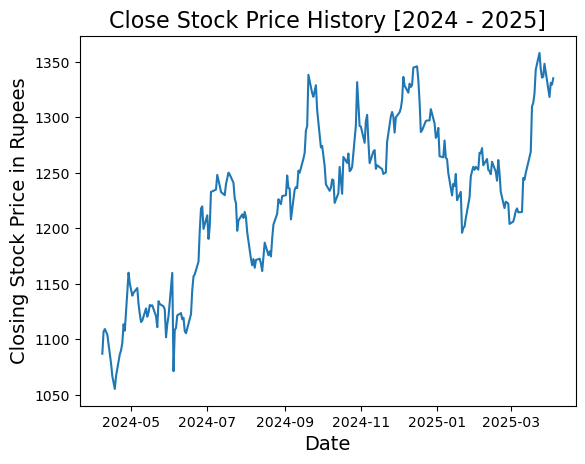

In [10]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

# months = mdates.MonthLocator()  # Get every month
# monthsFmt = mdates.DateFormatter('%b %Y')  # Format as 'Jan 2025', 'Feb 2025', etc.


# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['close'])

# Format the x-axis ticks
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(monthsFmt)

# Set figure title
plt.title('Close Stock Price History [2024 - 2025]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in Rupees', fontsize=14)

# Rotate and align the x labels
#fig.autofmt_xdate()

# Show plot
plt.show()


In [11]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)


In [12]:
# Import package for linear model
from sklearn.linear_model import LinearRegression
# Ensure 'train' is defined before using it
X_train = np.array(train.index).reshape(-1, 1)  # Reshape index column to 2D array
y_train = train['close']


In [13]:
X_train.shape

(198, 1)

In [14]:

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 1312.7132359263253
Coefficient: -0.6991185192193091


# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)


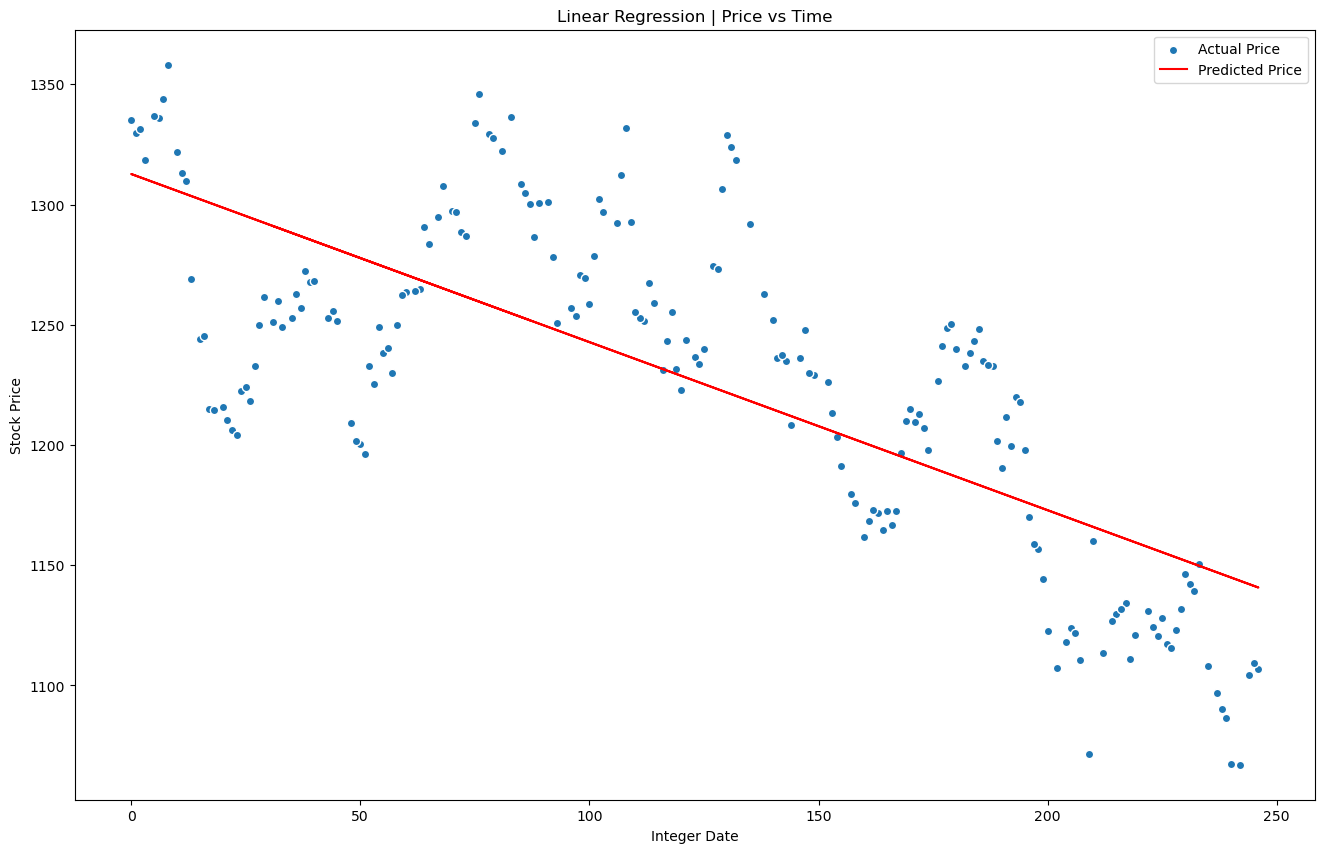

In [16]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [17]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']


In [18]:
X_test.shape

(50, 1)

In [19]:
# Generate array with predicted values
y_pred = model.predict(X_test)


In [20]:
# Get number of rows in data set for random sample
df.shape


(248, 2)

In [21]:
# Generate 25 random numbers
randints = np.random.randint(248, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample


,Date,close
23,2025-02-28,1204.10
38,2025-02-06,1272.40
39,2025-02-05,1267.70
50,2025-01-22,1200.45
53,2025-01-17,1225.45
95,2024-11-18,1253.45
120,2024-10-11,1223.00
129,2024-09-27,1306.60
144,2024-09-06,1208.15
150,2024-08-29,1221.90


In [22]:
sample_pred = model.predict(np.array(df_sample.index).reshape(-1, 1))
df_sample["Prediction"] = sample_pred

C:\Users\Dell\AppData\Local\Temp\ipykernel_8740\3527862139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["Prediction"] = sample_pred


In [23]:
df_sample.head()

,Date,close,Prediction
23,2025-02-28,1204.10,1296.633510
38,2025-02-06,1272.40,1286.146732
39,2025-02-05,1267.70,1285.447614
50,2025-01-22,1200.45,1277.757310
53,2025-01-17,1225.45,1275.659954


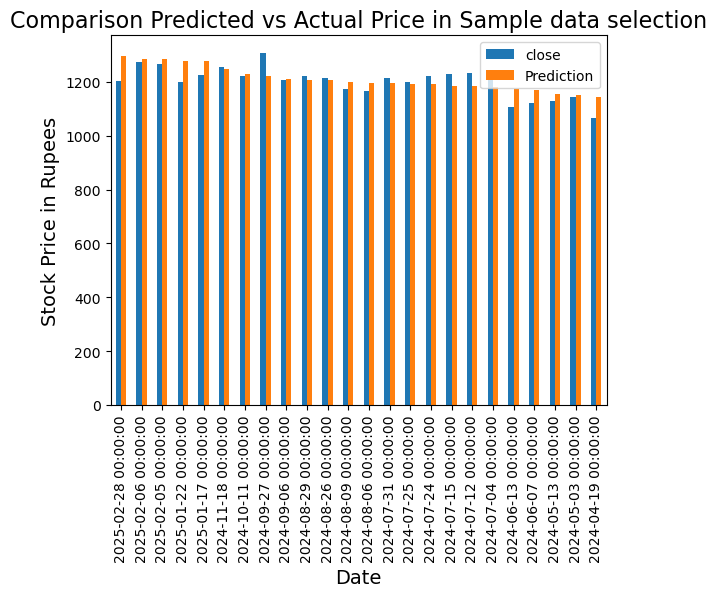

In [24]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in Rupees', fontsize=14)

# Show plot
plt.show()


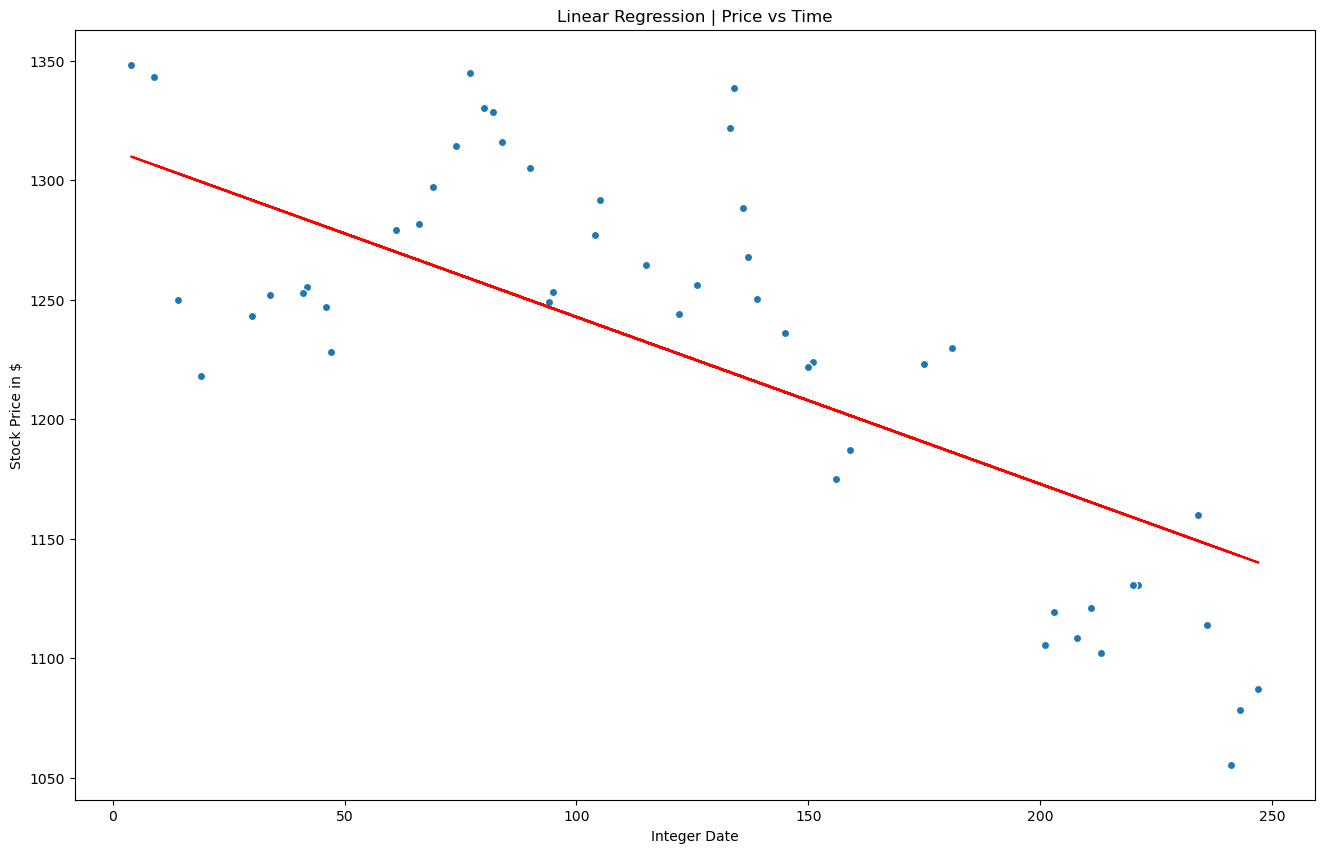

In [25]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()


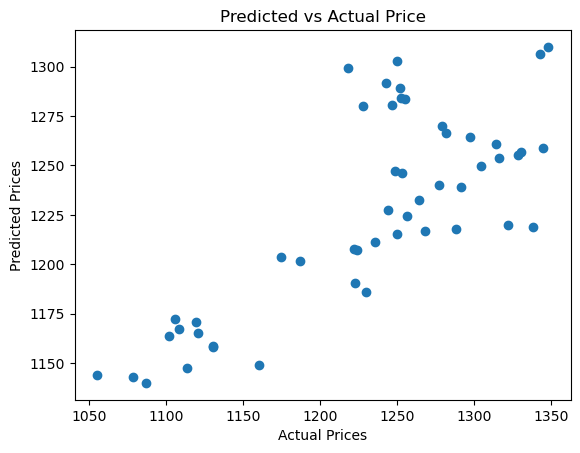

In [26]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8740\1423025362.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')


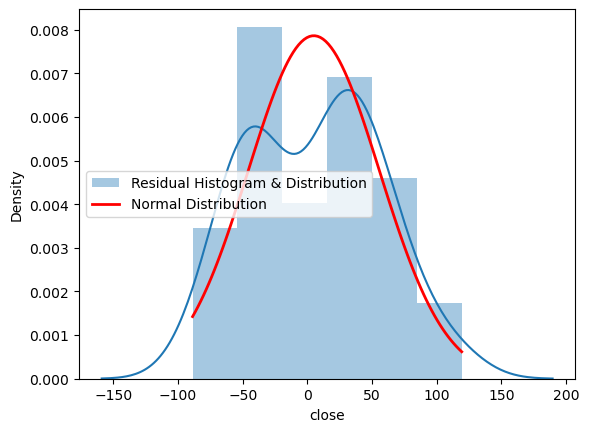

In [27]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()


In [28]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
df.head()


,Date,close,Prediction
0,2025-04-04,1335.30,1312.713236
1,2025-04-03,1329.55,1312.014117
2,2025-04-02,1331.25,1311.314999
3,2025-04-01,1318.45,1310.615880
4,2025-03-28,1348.35,1309.916762


In [29]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics


In [30]:
# Statistical summary of test data
df['close'].describe()


count     248.000000
mean     1227.381855
std        70.129399
min      1055.450000
25%      1178.562500
50%      1238.350000
75%      1272.550000
max      1358.150000
Name: close, dtype: float64

In [31]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 44.44641410560202
Mean Squared Error: 2599.086530250714
Root Mean Squared Error: 50.98123704119697


In [32]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.5866956100634687


In [33]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.5906844402560893